In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline 

In [2]:
data = pd.read_csv('yelp.csv')

In [3]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
data.iloc[0]

business_id                               9yKzy9PApeiPPOUJEtnvkg
date                                                  2011-01-26
review_id                                 fWKvX83p0-ka4JS3dc6E5A
stars                                                          5
text           My wife took me here on my birthday for breakf...
type                                                      review
user_id                                   rLtl8ZkDX5vH5nAx9C3q5Q
cool                                                           2
useful                                                         5
funny                                                          0
Name: 0, dtype: object

In [7]:
data['text'].iloc[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [8]:
data['length'] = data['text'].apply(len)

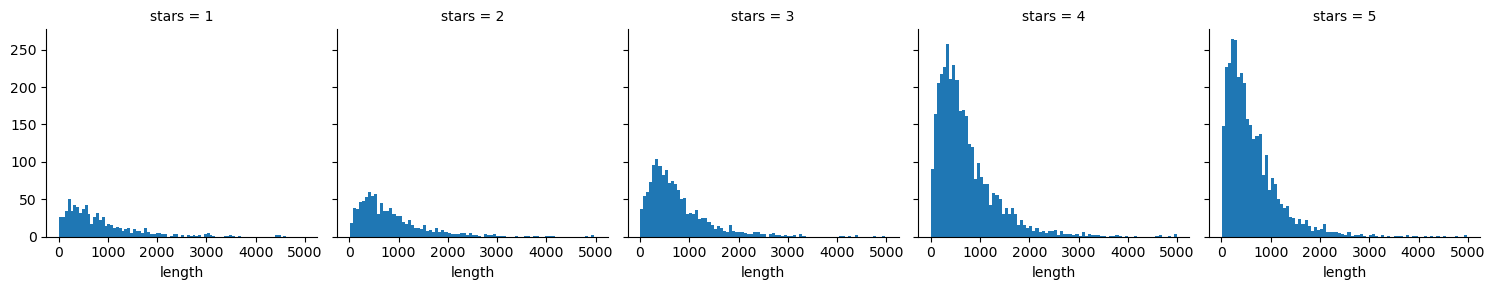

In [9]:
g = sns.FacetGrid(data, col='stars')
g.map(plt.hist, 'length', bins=80)

<AxesSubplot:xlabel='stars', ylabel='length'>

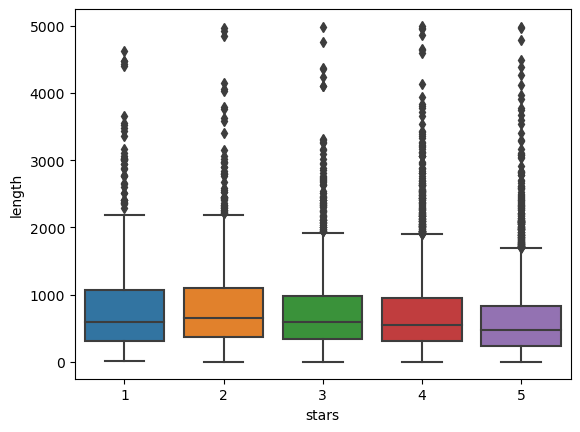

In [10]:
sns.boxplot(x='stars', y='length', data=data)

<AxesSubplot:xlabel='stars', ylabel='count'>

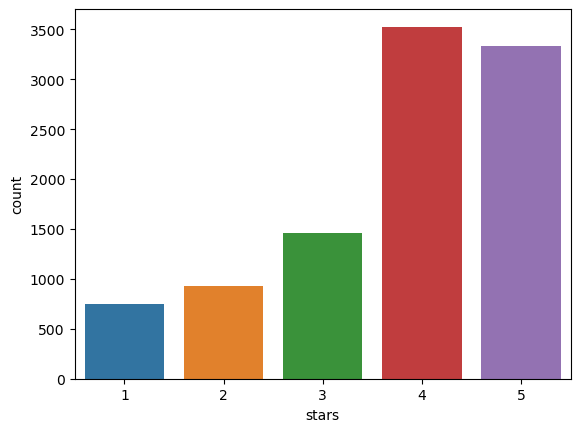

In [11]:
sns.countplot(x='stars', data=data)

In [12]:
stars = data.groupby('stars').mean()

In [13]:
stars.head()

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [14]:
stars.corr()

,cool,useful,funny,length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

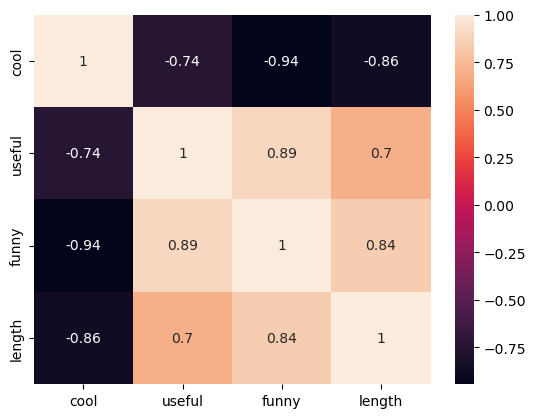

In [15]:
sns.heatmap(stars.corr(), annot=True)

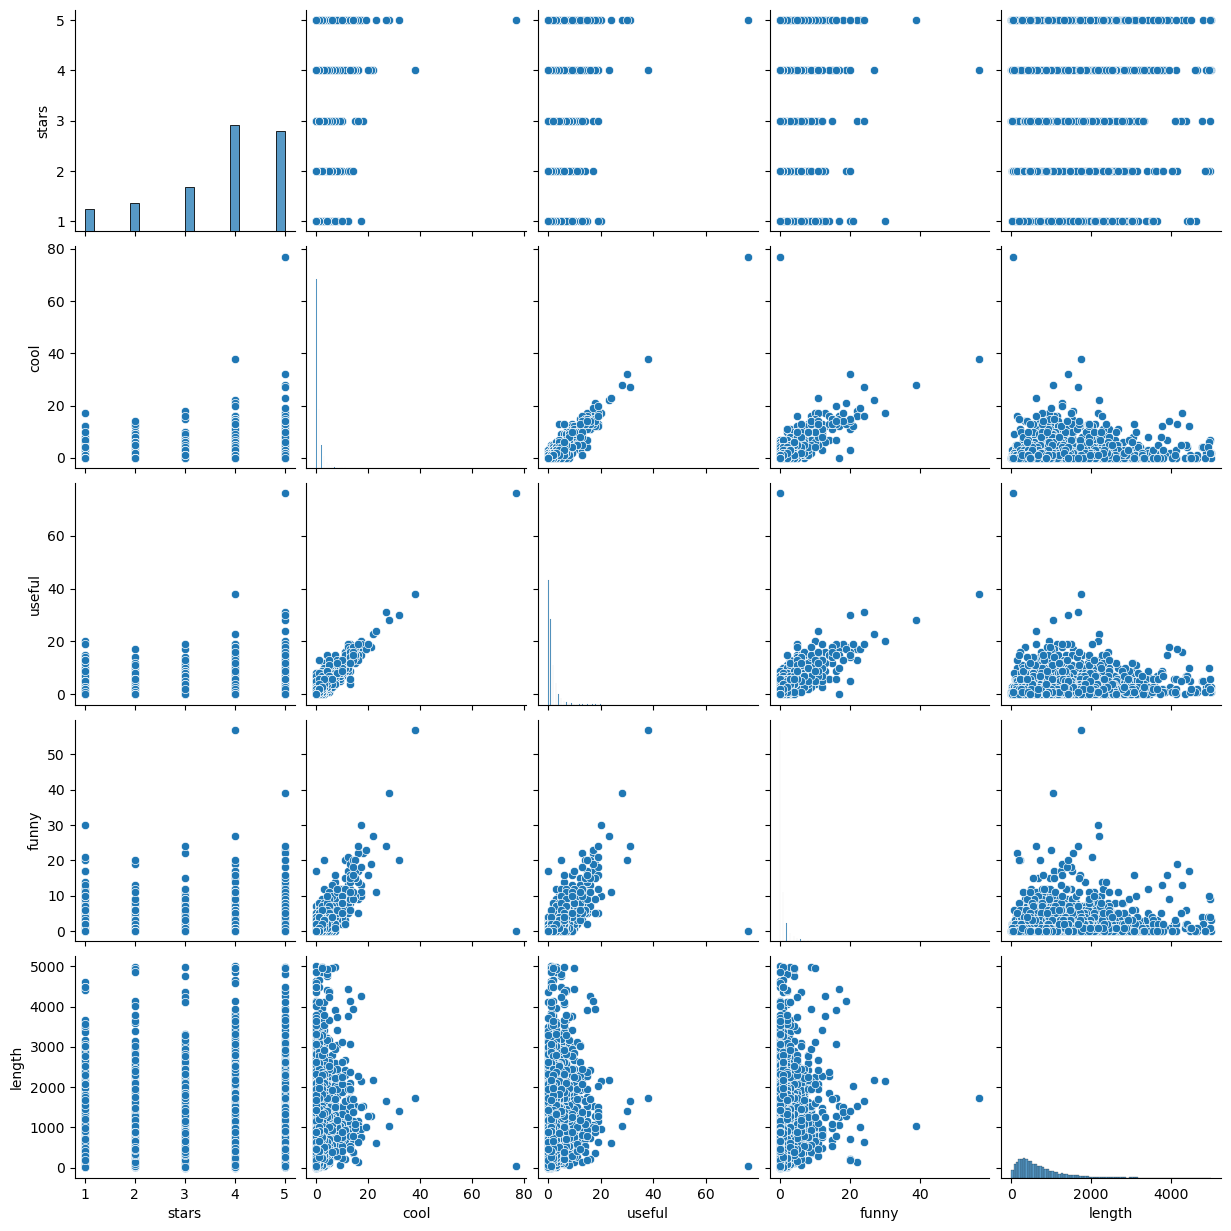

In [16]:
sns.pairplot(data)

In [17]:
data_class = data[(data['stars'] == 1) | (data['stars'] == 5)]

In [18]:
X, y = data_class['text'], data_class['stars']

In [19]:
cv = CountVectorizer()

In [20]:
X = cv.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
model = MultinomialNB()

In [23]:
model.fit(X_train, y_train)

MultinomialNB()

In [24]:
y_pred = model.predict(X_test)

In [25]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[107  40]
 [ 17 654]]
              precision    recall  f1-score   support

           1       0.86      0.73      0.79       147
           5       0.94      0.97      0.96       671

    accuracy                           0.93       818
   macro avg       0.90      0.85      0.87       818
weighted avg       0.93      0.93      0.93       818

